# EDA on User Features

These are the questions this EDA is answering:

- Data types ✅
- Missing values / Inconsistency ✅
- Features in each dataset ✅
- Size ✅
- Duplicates ✅
- Outliers ✅
- Who are the unique users ? ✅
- What is the number of interactions per user ? ✅
- What is the frequence of interactions, are there any periodic behavior ?
- Who are famous (lots of followers) ? ✅
- What are the differences in interaction between users who are / are not engaged ? ✅
- What are the differences in interaction between video maker and not video maker ? ✅
- Do specific users interact with specific types of content ?
- What is the average number of videos each user interacts with over time ?
- Are there groups of users who tend to interact with the same videos ?
- How long does it take for a user to re-interact with the same creator or video type?
- What’s the average session duration per user? How many videos per session?
- How does user activity evolve over their lifetime on the platform (new vs. old users)?

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from cycler import cycler
import matplotlib.pyplot as plt
import seaborn as sns

from eda_utils import plot_hist_feature

# set plot size
plt.rcParams["figure.figsize"] = (20, 13)
colors = plt.get_cmap('tab10').colors
plt.rc('axes', prop_cycle=cycler('color', colors))
%matplotlib inline
%config InlineBackend.figure_format = "retina"

## User Features

The user dataset including features about the user itself.

This can be useful if we were to consider user characteristics in our recommendation.

In [3]:
users = pd.read_csv("../data_final_project/KuaiRec 2.0/data/user_features.csv")
users

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,7171,full_active,0,0,1,52,"(50,100]",1,"[1,10)",0,...,259,1,4,0,1.0,0.0,0.0,0.0,0.0,0.0
7172,7172,full_active,0,0,0,45,"(10,50]",2,"[1,10)",2,...,11,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0
7173,7173,full_active,0,0,0,615,500+,3,"[1,10)",2,...,51,2,2,0,1.0,0.0,0.0,0.0,0.0,0.0
7174,7174,full_active,0,0,0,959,500+,0,0,0,...,107,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
users.describe()

,user_id,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,fans_user_num,friend_user_num,register_days,onehot_feat0,onehot_feat1,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
count,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,...,7176.000000,7176.000000,7176.000000,7176.000000,7099.000000,7101.000000,7101.000000,7102.000000,7102.000000,7102.000000
mean,3587.500000,0.000418,0.006828,0.169593,197.327899,12.553094,4.494844,296.790691,0.392280,2.670569,...,168.661511,3.831940,2.264353,0.137124,0.298774,0.104633,0.094775,0.018586,0.017882,0.014503
std,2071.677098,0.020444,0.082357,0.375301,426.543245,181.017537,44.897861,286.381320,0.488293,1.782502,...,96.254783,1.747046,1.063131,0.500184,0.457753,0.306102,0.292925,0.135068,0.132533,0.119560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1793.750000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,132.000000,0.000000,1.000000,...,88.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3587.500000,0.000000,0.000000,0.000000,33.000000,2.000000,0.000000,225.000000,0.000000,2.000000,...,167.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5381.250000,0.000000,0.000000,0.000000,130.000000,6.000000,1.000000,324.000000,1.000000,4.000000,...,255.000000,5.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7175.000000,1.000000,1.000000,1.000000,2100.000000,11401.000000,1425.000000,2245.000000,1.000000,7.000000,...,339.000000,6.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
users.shape

(7176, 31)

### Generic questions

#### DTypes

In [89]:
print(users.dtypes)
print(users["follow_user_num_range"].unique())
print(users["register_days_range"].unique())
print(users["fans_user_num_range"].unique())
print(users["is_live_streamer"].unique())
print(users["is_video_author"].unique())
# follow_user_num_range, register_days_range, fans_user_num_range -> OHE
# is_live_streamer, is_video_author -> boolean

user_id                    int64
user_active_degree        object
is_lowactive_period        int64
is_live_streamer           int64
is_video_author            int64
follow_user_num            int64
follow_user_num_range     object
fans_user_num              int64
fans_user_num_range       object
friend_user_num            int64
friend_user_num_range     object
register_days              int64
register_days_range       object
onehot_feat0               int64
onehot_feat1               int64
onehot_feat2               int64
onehot_feat3               int64
onehot_feat4             float64
onehot_feat5               int64
onehot_feat6               int64
onehot_feat7               int64
onehot_feat8               int64
onehot_feat9               int64
onehot_feat10              int64
onehot_feat11              int64
onehot_feat12            float64
onehot_feat13            float64
onehot_feat14            float64
onehot_feat15            float64
onehot_feat16            float64
onehot_fea

#### NA

In [128]:
print(users.isna().any())
users = users.drop(columns=users.filter(regex=r'^onehot_feat\d{1,2}$').columns)
print(users[users.isna().any(axis=1)])
print(users.dropna().shape[0] / interactions_test.shape[0])
#users = users.dropna()

user_id                  False
user_active_degree       False
is_lowactive_period      False
is_live_streamer         False
is_video_author          False
follow_user_num          False
follow_user_num_range    False
fans_user_num            False
fans_user_num_range      False
friend_user_num          False
friend_user_num_range    False
register_days            False
register_days_range      False
onehot_feat0             False
onehot_feat1             False
onehot_feat2             False
onehot_feat3             False
onehot_feat4              True
onehot_feat5             False
onehot_feat6             False
onehot_feat7             False
onehot_feat8             False
onehot_feat9             False
dtype: bool
Empty DataFrame
Columns: [user_id, user_active_degree, is_lowactive_period, is_live_streamer, is_video_author, follow_user_num, follow_user_num_range, fans_user_num, fans_user_num_range, friend_user_num, friend_user_num_range, register_days, register_days_range]
Index: []
0.

In [129]:
f"{users.memory_usage(deep=True).sum() / (1024 ** 2)} MB"

'2.3309030532836914 MB'

#### Duplicates

In [130]:
print(users[users.duplicated(subset=['user_id'])])

Empty DataFrame
Columns: [user_id, user_active_degree, is_lowactive_period, is_live_streamer, is_video_author, follow_user_num, follow_user_num_range, fans_user_num, fans_user_num_range, friend_user_num, friend_user_num_range, register_days, register_days_range]
Index: []


### User Features

#### User active degree repartition

Most of the users are either full or highly active.
User interactions are in fact greater in *full_active* than other categories though the difference is not relevant

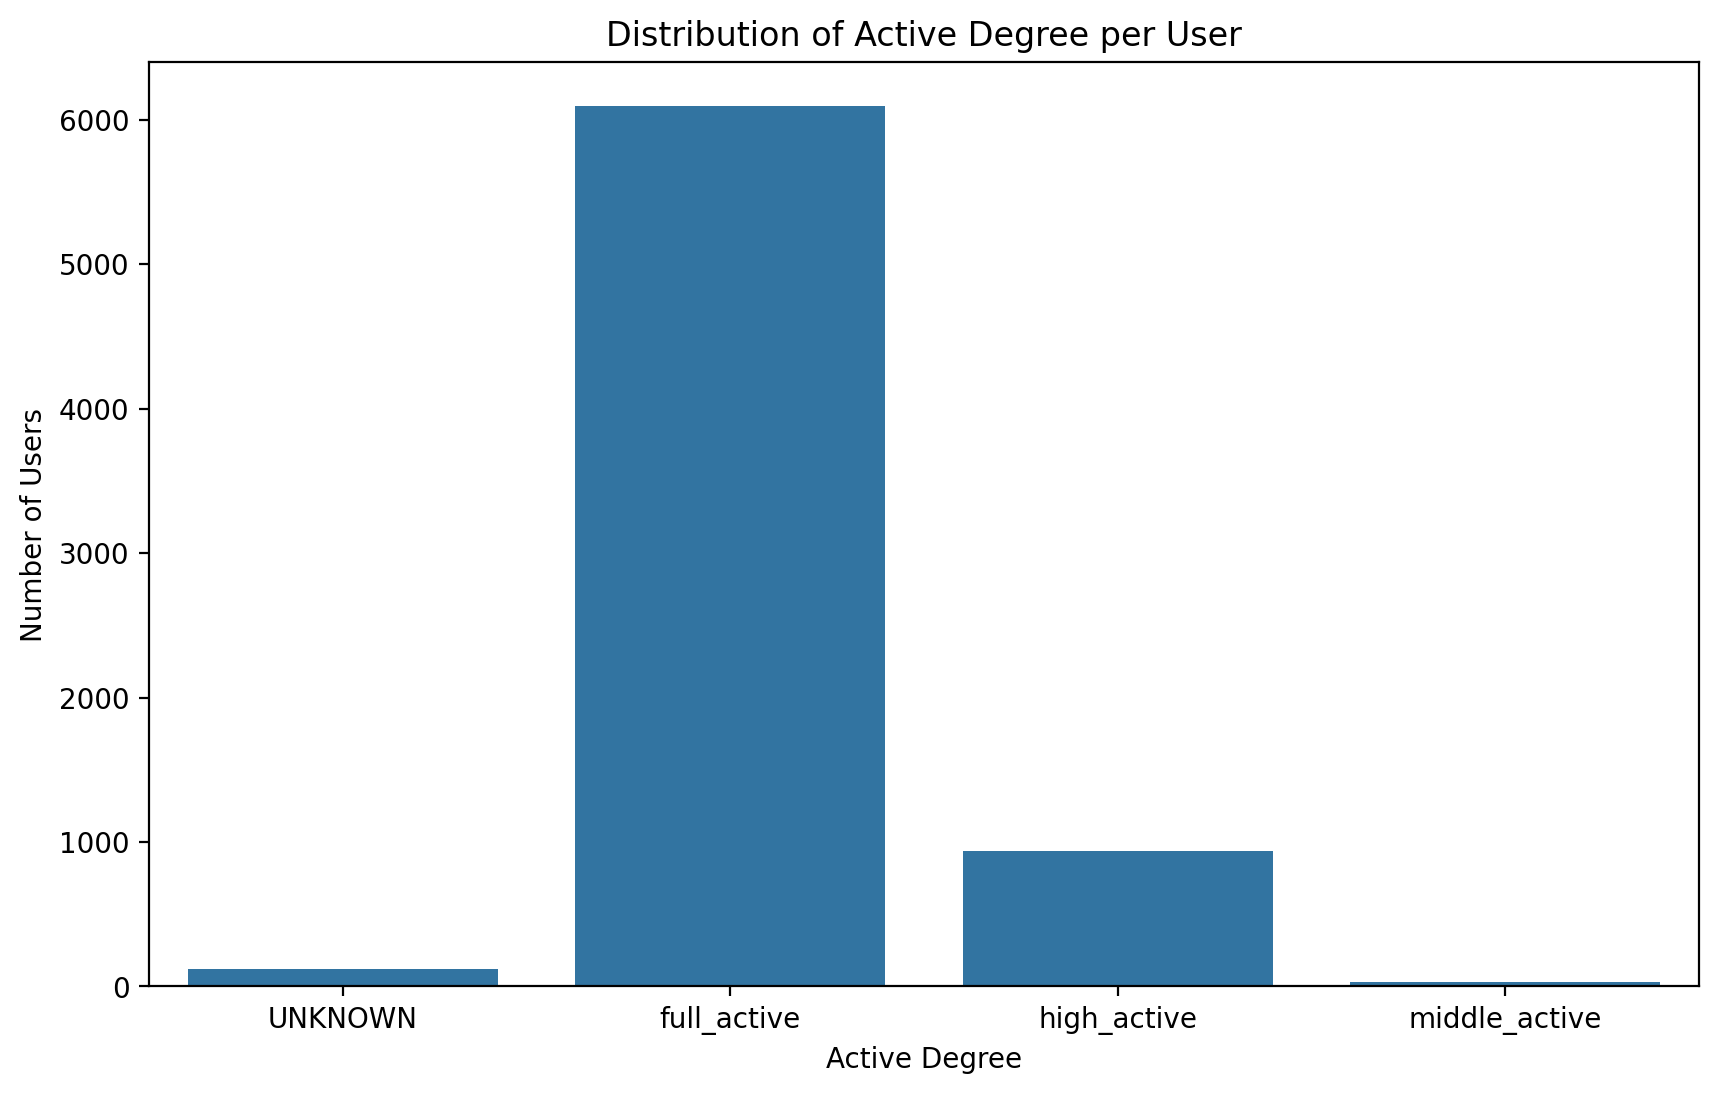

In [7]:
# Create the active degree distribution (number of users per active degree)
active_degree_repartition = users.groupby('user_active_degree')['user_id'] \
    .count() \
    .reset_index(name='active_degree_repartition')

plt.figure(figsize=(10, 6))
sns.barplot(x='user_active_degree', y='active_degree_repartition', data=active_degree_repartition)

plt.xlabel('Active Degree')
plt.ylabel('Number of Users')
plt.title('Distribution of Active Degree per User')

plt.show()

In [1]:
interactions_per_user = interactions_train.groupby('user_id')['video_id'].count().reset_index(name='total_interactions')

interaction_per_category = interactions_per_user.merge(users[['user_id', 'user_active_degree']], on='user_id')

plt.figure(figsize=(12, 6))
sns.boxplot(hue='user_active_degree', y='total_interactions', data=interaction_per_category, legend=True)

plt.xlabel('User Active Degree')
plt.ylabel('Total Interactions per User')
plt.title('Distribution of Total Interactions per User by Category')

plt.show()

NameError: name 'interactions_train' is not defined

#### Streamers / Video Makers and their interactions

We anaylze the impact of the user's category with their interactions

The category of user **does not hold any particular information**

Streamers tend to interact a little bit more, but it is not relevant in our case

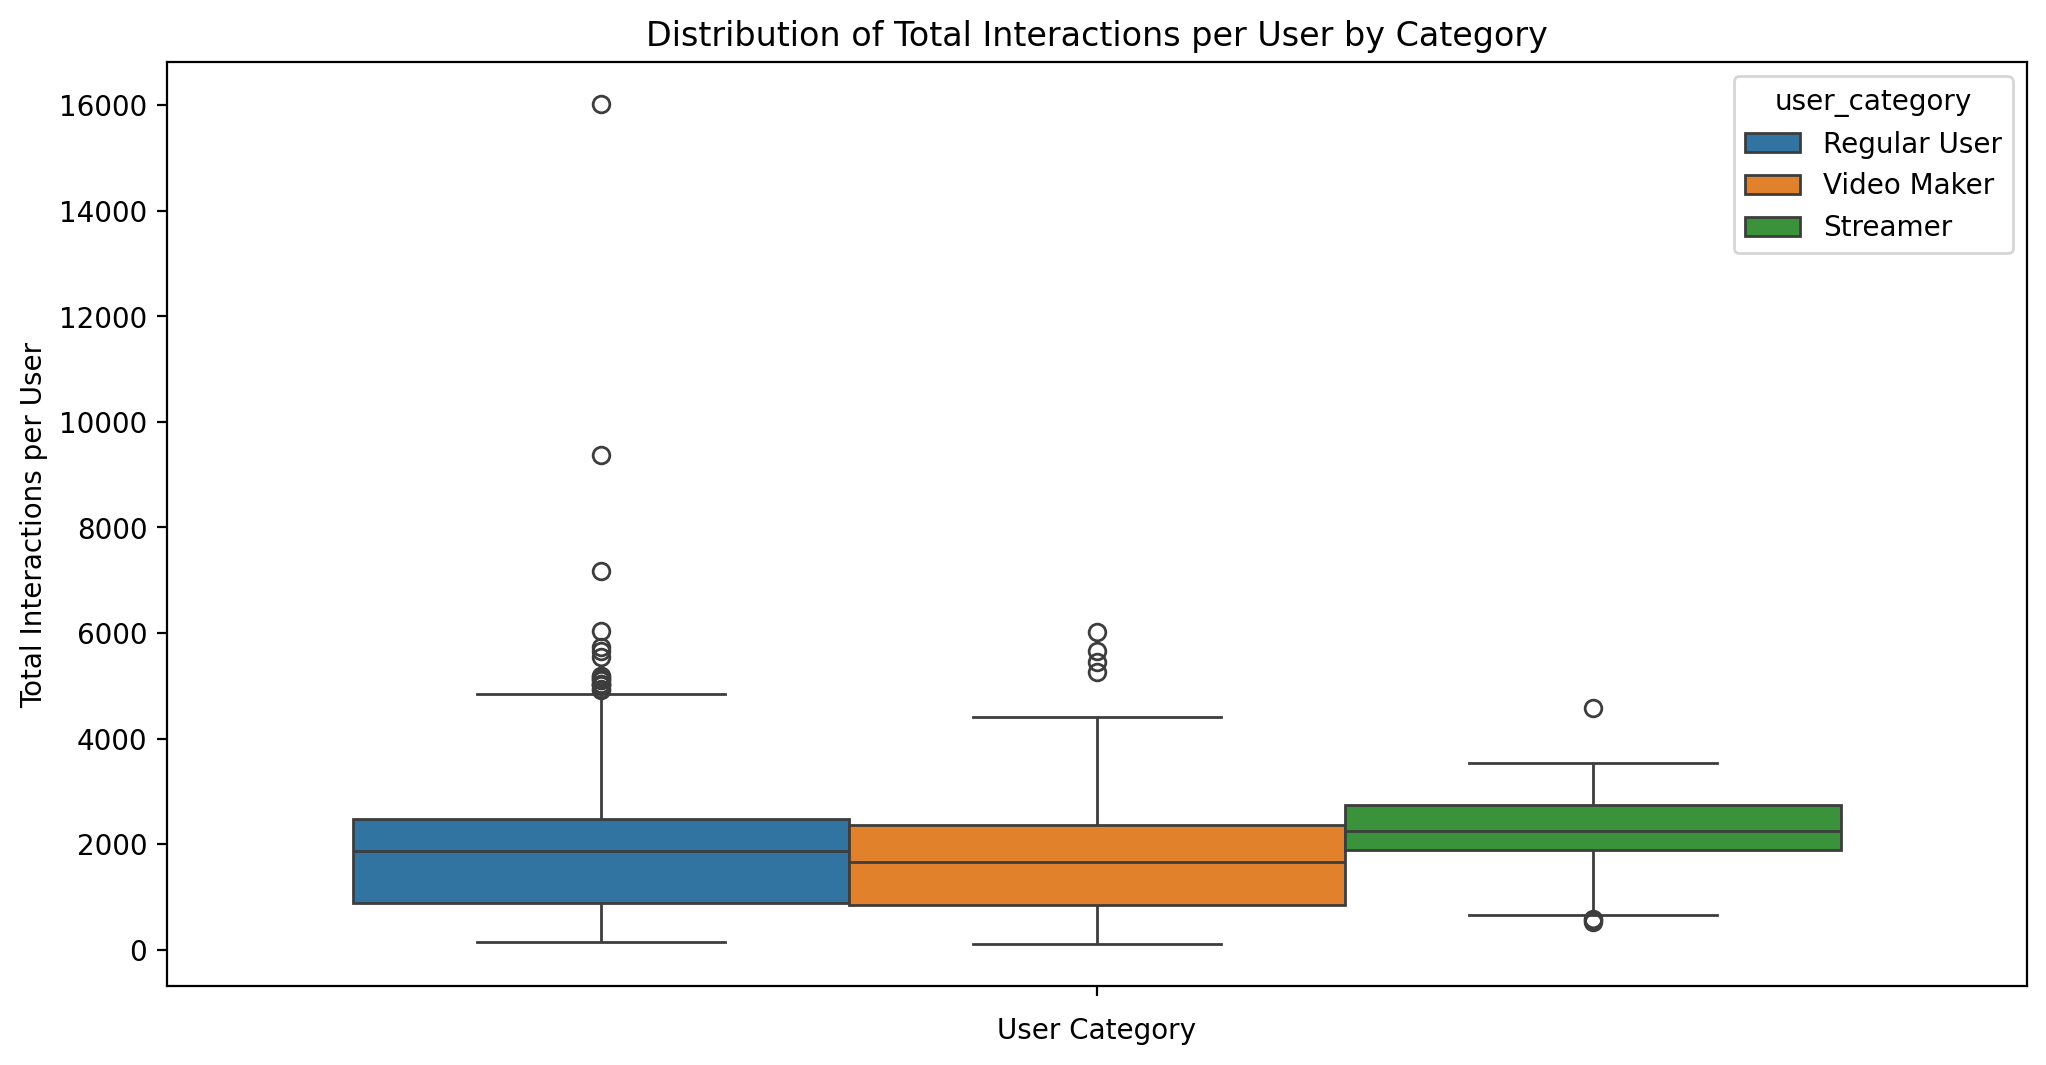

In [10]:
interactions_per_user = interactions_train.groupby('user_id')['video_id'].count().reset_index(name='total_interactions')

users['user_category'] = 'Regular User'
users.loc[users['is_video_author'] == 1, 'user_category'] = 'Video Maker'
users.loc[users['is_live_streamer'] == 1, 'user_category'] = 'Streamer'

interaction_per_category = interactions_per_user.merge(users[['user_id', 'user_category']], on='user_id')

plt.figure(figsize=(12, 6))
sns.boxplot(hue='user_category', y='total_interactions', data=interaction_per_category, legend=True)

plt.xlabel('User Category')
plt.ylabel('Total Interactions per User')
plt.title('Distribution of Total Interactions per User by Category')

plt.show()

#### Famous / Not Famous interactions

We anaylze the impact of the user's followers and following with their interactions

The following / followers of user **does not hold any particular information**

We can see some outliers as well and there are no specific categories having more interactions

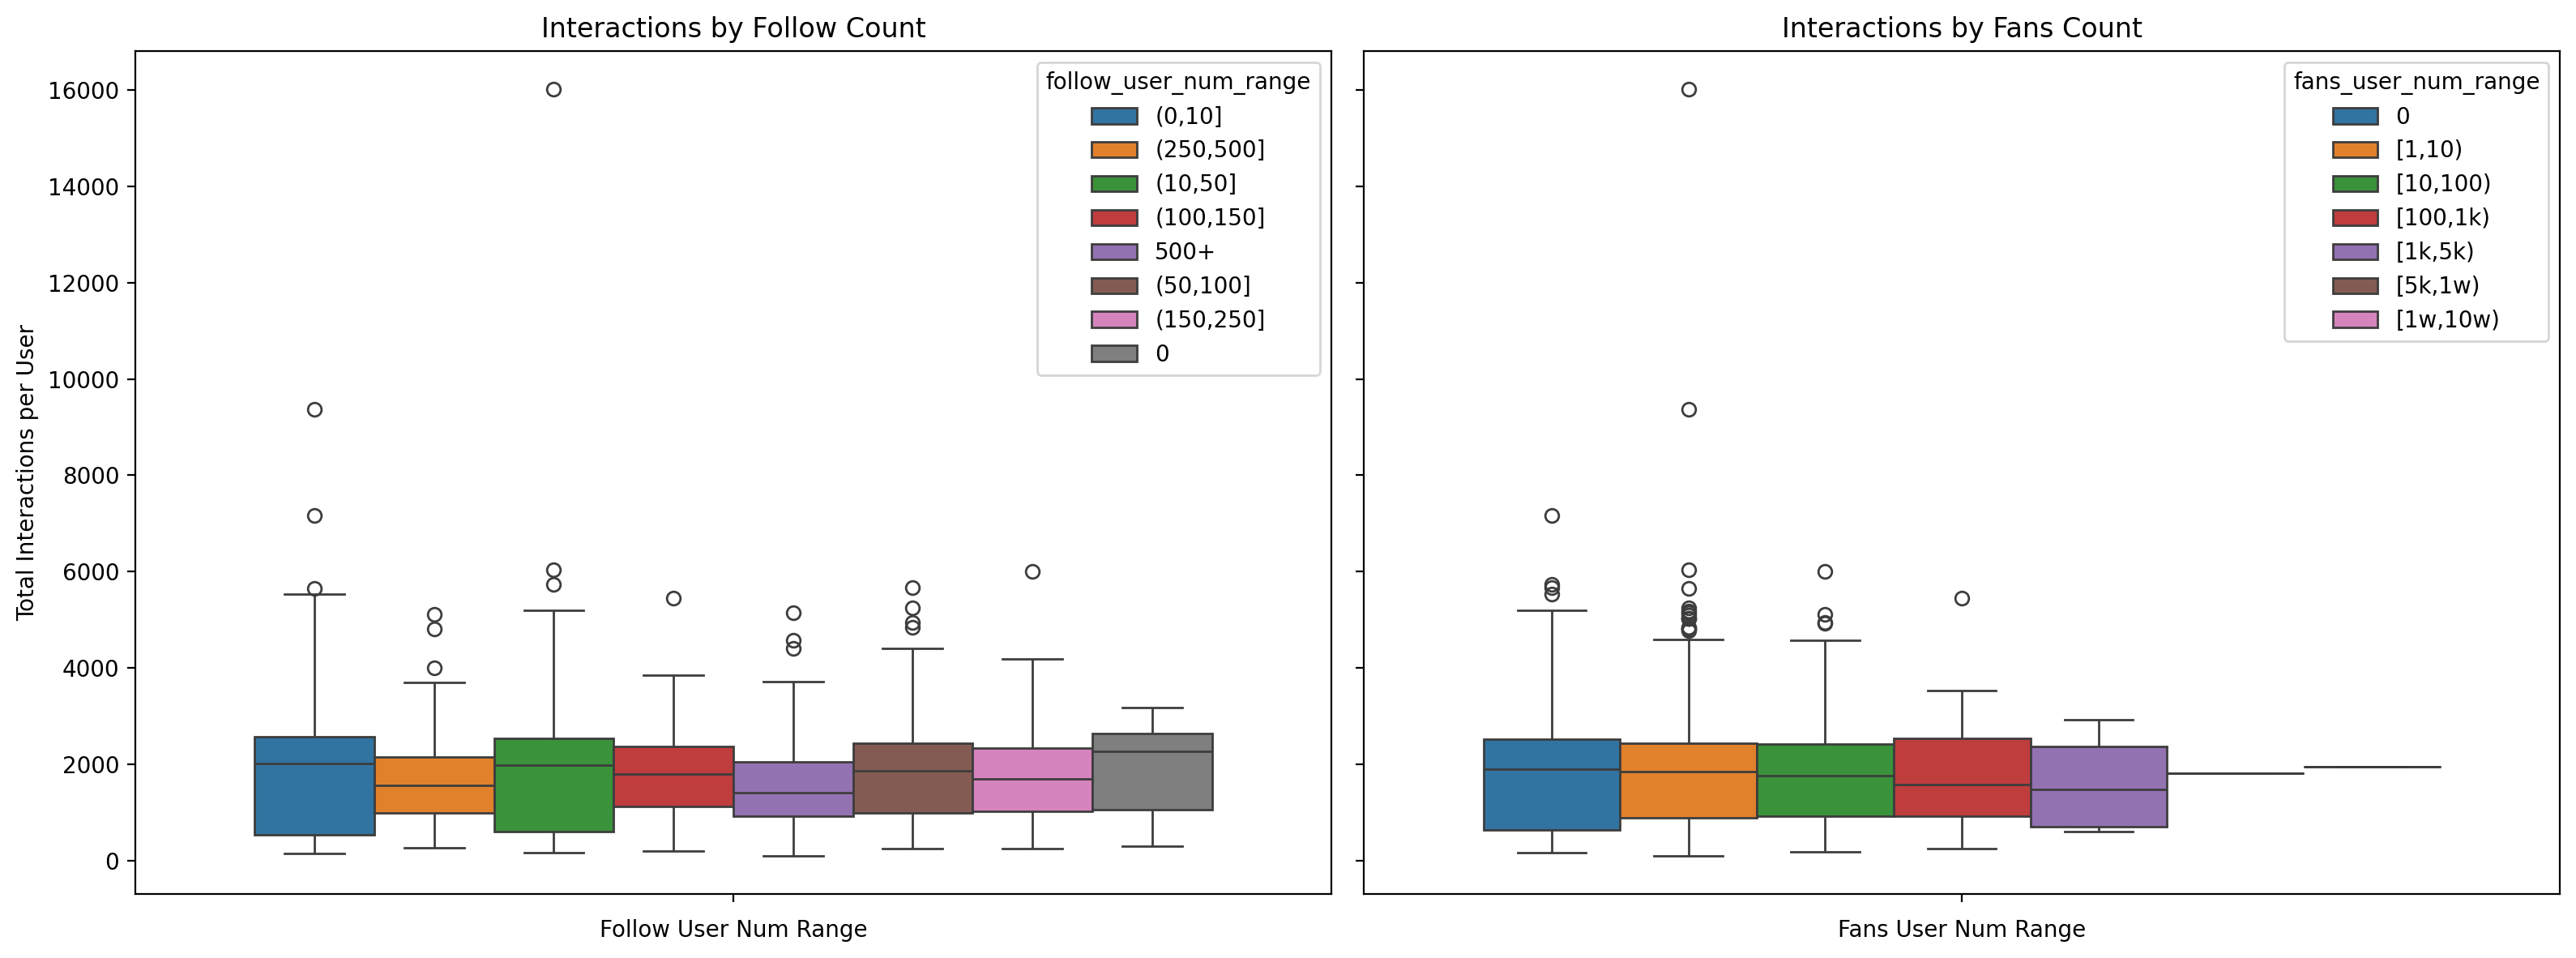

In [161]:
interactions_per_user = interactions_train.groupby('user_id')['video_id'].count().reset_index(name='total_interactions')
interaction_with_bins = interactions_per_user.merge(
    users[['user_id', 'follow_user_num_range', 'fans_user_num_range']],
    on='user_id'
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Boxplot for follow_user_num_range
sns.boxplot(hue='follow_user_num_range', y='total_interactions', data=interaction_with_bins, ax=axes[0], legend=True)
axes[0].set_xlabel('Follow User Num Range')
axes[0].set_ylabel('Total Interactions per User')
axes[0].set_title('Interactions by Follow Count')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for fans_user_num_range
sns.boxplot(hue='fans_user_num_range', y='total_interactions', data=interaction_with_bins, ax=axes[1], legend=True)
axes[1].set_xlabel('Fans User Num Range')
axes[1].set_ylabel('')  # Already shown on the left
axes[1].set_title('Interactions by Fans Count')
axes[1].tick_params(axis='x', rotation=45)

# Layout adjustment
plt.tight_layout()
plt.show()

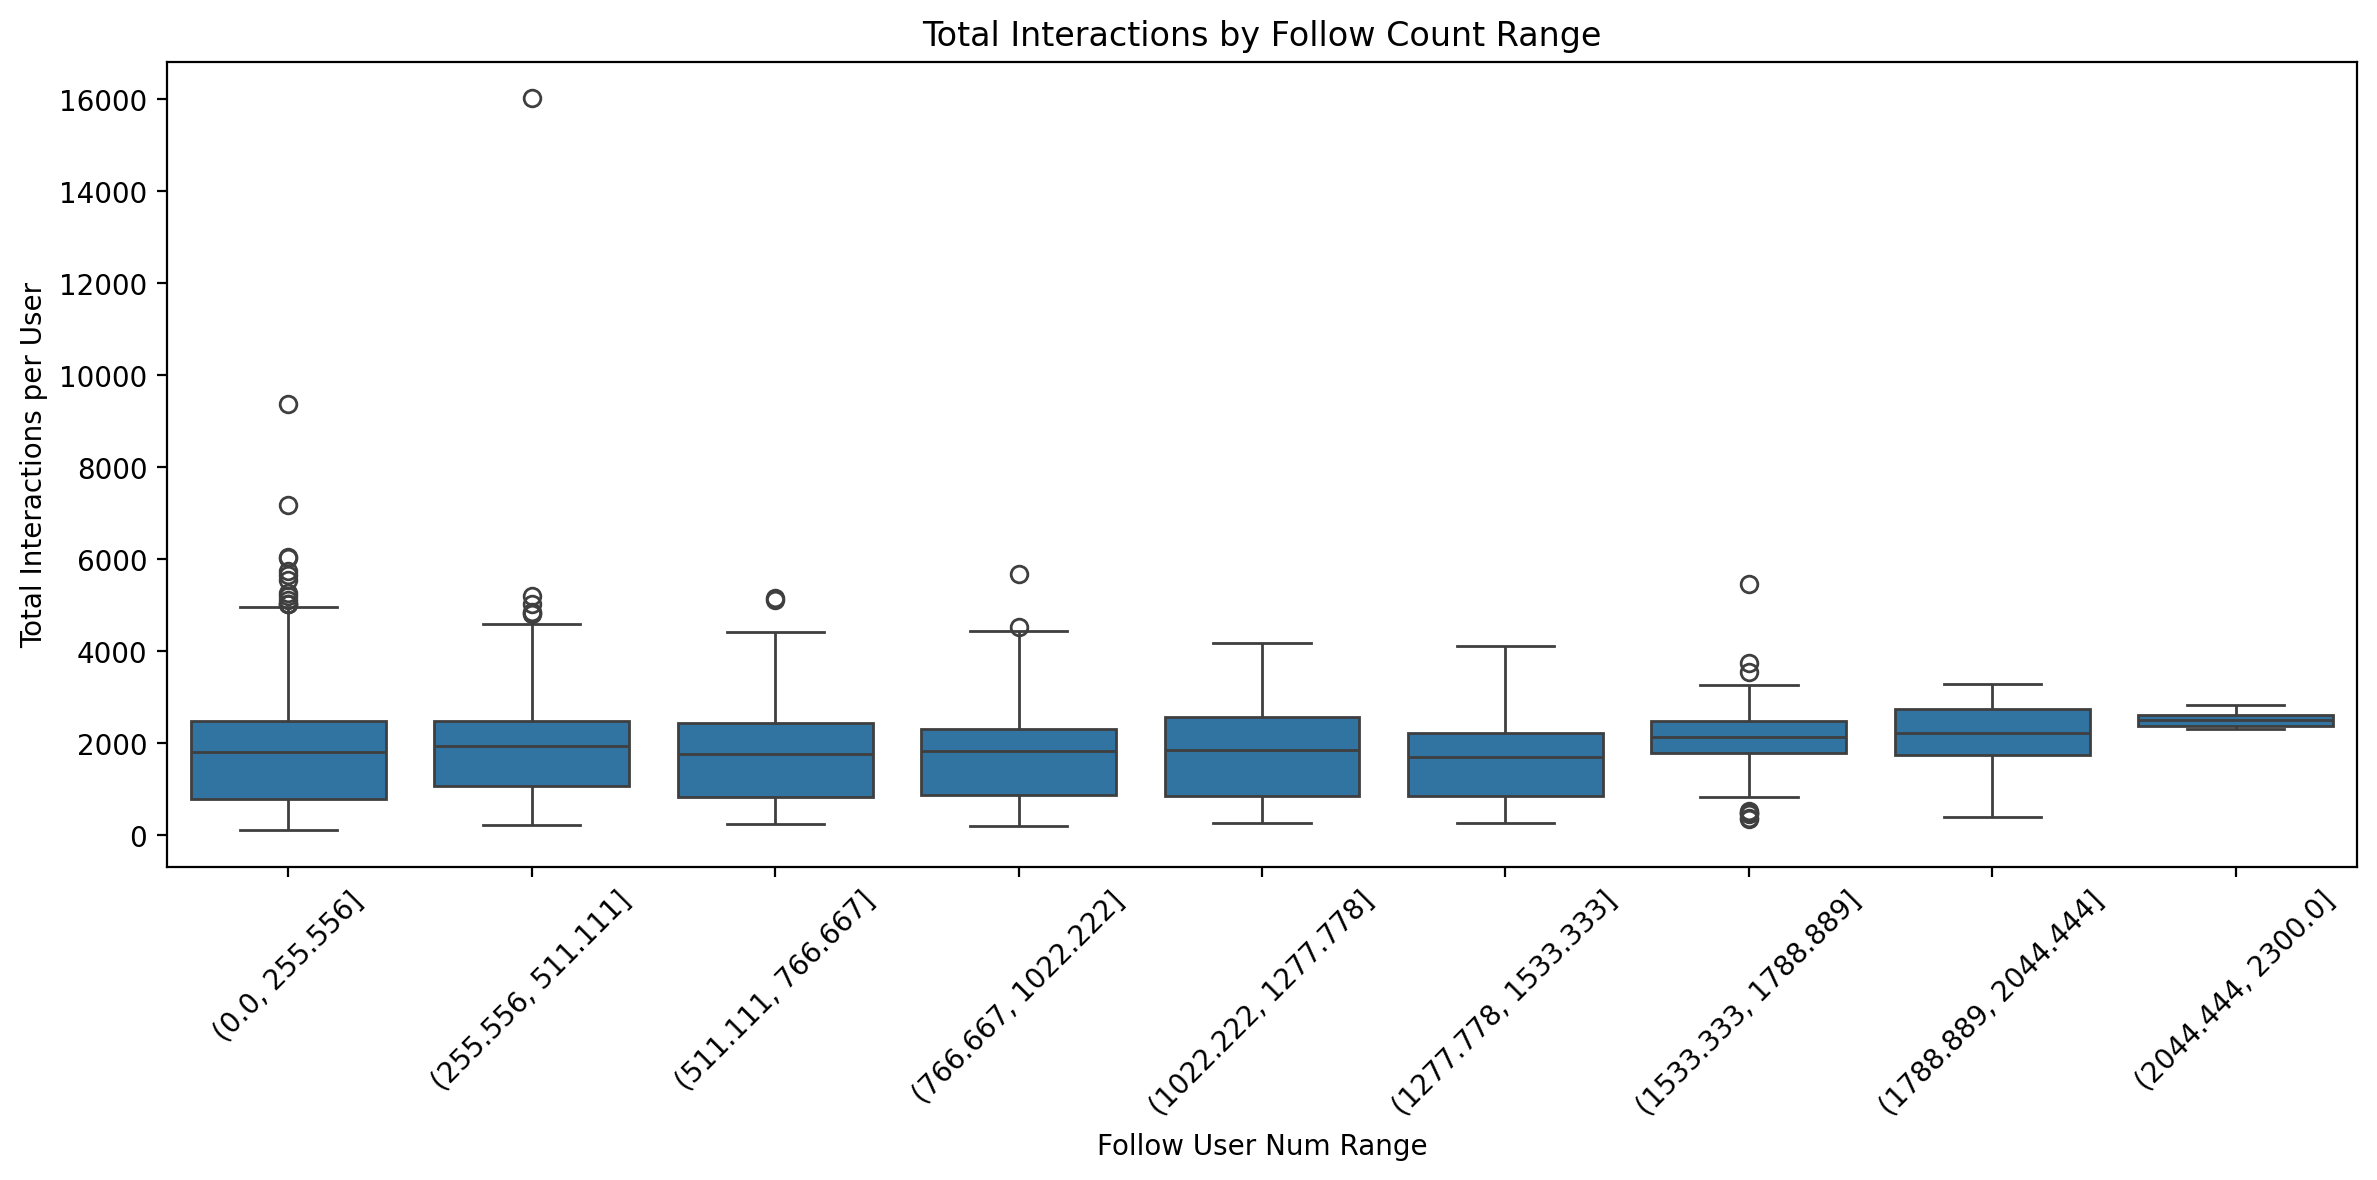

In [153]:
interactions_per_user = interactions_train.groupby('user_id')['video_id'].count().reset_index(name='total_interactions')
interaction_with_bins = interactions_per_user.merge(
    users[['user_id', 'register_days']],
    on='user_id'
)
interaction_with_bins["register_days"] = pd.cut(interaction_with_bins['register_days'], np.linspace(0, 2300, 10))

plt.figure(figsize=(12, 6))
sns.boxplot(x='register_days', y='total_interactions', data=interaction_with_bins)

plt.xlabel('Follow User Num Range')
plt.ylabel('Total Interactions per User')
plt.title('Total Interactions by register day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Social Network

The social network graph is also given.

This can be useful to **recommend a video based on friendship / followers**

We could even detect clusters of users that have similar interests.

In [ ]:
social_network = pd.read_csv("../data_final_project/KuaiRec 2.0/data/social_network.csv")
social_network.head()

In [ ]:
social_network.shape